In [16]:
from IPython.core.display import display, HTML, Markdown
import networkx as nx
import copy
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [17]:
def evaluation_format(answ, pt_green,pt_red):
    pt_blue=0
    if pt_green!=0:
        pt_blue=pt_red-pt_green
        pt_red=0
    return f"{answ}. Totalizzeresti <span style='color:green'>[{pt_green} safe pt]</span>, \
                                    <span style='color:blue'>[{pt_blue} possible pt]</span>, \
                                    <span style='color:red'>[{pt_red} out of reach pt]</span>.<br>"

def visualizza(grafo):
    #layout grafo
    pos=nx.planar_layout(grafo)
    #disegna nodi e etichette sui nodi
    nx.draw_networkx_nodes(grafo, pos)
    nx.draw_networkx_labels(grafo, pos)
    #disegna archi e etichette sugli archi
    nx.draw_networkx_edges(grafo, pos)
    labels = nx.get_edge_attributes(grafo,'w')
    nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels)
    plt.show()
    
def verifica_ciclo_negativo(grafo,node_list):
    n=len(node_list)
    check = 0
    try:
        for i in range(1,n):
            check += G[node_list[i-1]][node_list[i]]['w']
        check += G[node_list[n-1]][node_list[0]]['w']
        if check < 0:
            return  evaluation_format("Si", 10, 10)+f"La sequenza di nodi $node_list={node_list}$ che hai fornito contiene un ciclo negativo."
        else:
            evaluation_format("No", 0, 10)+f"La sequenza di nodi $node_list={node_list}$ che hai fornito NON contiene un ciclo negativo."
    except:
        return evaluation_format("No", 0, 10)+f"La sequenza di nodi $node_list={node_list}$ che hai fornito non forma un ciclo nel grafo"
    
def verifica_presenza_solo_cicli_positivi(grafo, pesi_nodi):
    if len(pesi_nodi)!=len(grafo.nodes):
        return evaluation_format("No", 0, 10)+f"La lista che hai fornito dà un peso a ${len(pesi_nodi)}$ nodi, mentre i nodi nel grafo sono ${len(grafo.nodes)}$"
    G=copy.deepcopy(grafo)
    for (u,v) in G.edges:
        G[u][v]['w'] = G[u][v]['w'] - pesi_nodi[v] + pesi_nodi[u]
    visualizza(G)
    for (u,v) in G.edges:
        if G[u][v]['w'] < 0:
            return evaluation_format("No", 0, 10)+f"Come vedi dal grafo $G'$ sopra rappresentato, ricavato da $G$ con i valori da te inseriti, compare ancora un ciclo negativo"
    return evaluation_format("SI", 10, 10)+f"Come vedi dal grafo $G'$ sopra rappresentato, ricavato da $G$ con i valori da te inseriti, mi hai dimostrato che in $G$ non sono presenti cicli negativi"

In [18]:
#grafo ciclo negativo
nodes=[0,1,2,3]
edges=[(0,2,{'w': 1}),(2,1,{'w': 1}),(2,3,{'w': 2}),(1,0,{'w': -5}),(1,3,{'w': 1})]
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

#grafo senza cicli negativi
nodes=[0,1,2,3]
edges=[(0,2,{'w': -1}),(2,1,{'w': -1}),(2,3,{'w': 2}),(1,0,{'w': 4}),(1,3,{'w': 1})]
H = nx.DiGraph()
H.add_nodes_from(nodes)
H.add_edges_from(edges)

#grafo random di test visualizzazione
#R=nx.gn_graph(15)

## Esercizio \[60 pts\]
(CICLI) Riconosci cicli se in un grafo è presente un ciclo negativo oppure forniscimi la prova che nel grafo non vi sono cicli negativi

Dato il seguente grafo orientato G=(|V|=n,|E|=m) con i nodi etichettati da 0 a n-1 e gli archi pesati, rispondi alle seguenti domande.

G=(V,E)

V=[0, 1, 2, 3]

E=[(0, 2, {'w': 1}), (1, 0, {'w': -5}), (1, 3, {'w': 1}), (2, 1, {'w': 1}), (2, 3, {'w': 2})]

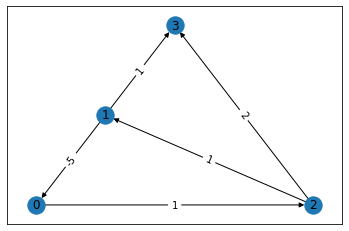

In [19]:
# Ecco il grafo in input:
display(Markdown(f"G=(V,E)"))
display(Markdown(f"V={G.nodes}"))
display(Markdown(f"E={G.edges.data()}"))
visualizza(G)

__Richieste__:

1. Forniscimi una lista di vertici che formano un ciclo negativo (rispetta la direzione degli archi)

In [7]:
# Certificato di si, HA CICLI NEGATIVI
# fornisci sottosequenza di archi

ciclo_neg=[2,1,0]
display(Markdown(verifica_ciclo_negativo(G,ciclo_neg)))

Si. Totalizzeresti <span style='color:green'>[10 safe pt]</span>,                                     <span style='color:blue'>[0 possible pt]</span>,                                     <span style='color:red'>[0 out of reach pt]</span>.<br>La sequenza di nodi $node_list=[2, 1, 0]$ che hai fornito contiene un ciclo negativo.

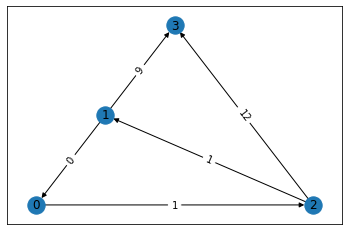

SI. Totalizzeresti <span style='color:green'>[10 safe pt]</span>,                                     <span style='color:blue'>[0 possible pt]</span>,                                     <span style='color:red'>[0 out of reach pt]</span>.<br>Come vedi dal grafo $G'$ sopra rappresentato, ricavato da $G$ con i valori da te inseriti, mi hai dimostrato che in $G$ non sono presenti cicli negativi

In [14]:
# Certificato di no, fornire peso che fa si che tutti gli archi abbiano un peso positivo
# i nodi vanno da 1 a n-1, mettimi il valore da sommare per far si di farmi vedere che tutti i cicli sono positivi

pesi_nodi=[12,8,10,0]
display(Markdown(verifica_presenza_solo_cicli_positivi(H,pesi_nodi)))